# Title : Exploratory Data Analysis (EDA) of Titanic Passengers

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the plot of Seaborn to look better
sns.set_theme(style="darkgrid")

print("Library successfully imported!")

Library successfully imported!


In [2]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Print the first 5 rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Initial Data Inspection
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Data Cleaning

In [4]:

# Filling blank values in the 'age' column with the median (middle value)
# The median is better than the mean (average) if there are outliers
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# The 'deck' column has too many blank values, so we'll just drop it.
df.drop('deck', axis=1, inplace=True)

# The 'embarked' column only has a few blank values, so we'll fill them with the mode (the most frequently occurring value).
mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)

# Reviewing the data information after cleaning
print("Dataset Information After Cleaning:")
df.info()

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34504\4272055668.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34504\4272055668.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Data Analysis and Visualization

1. How many passengers survived vs. did not survive?

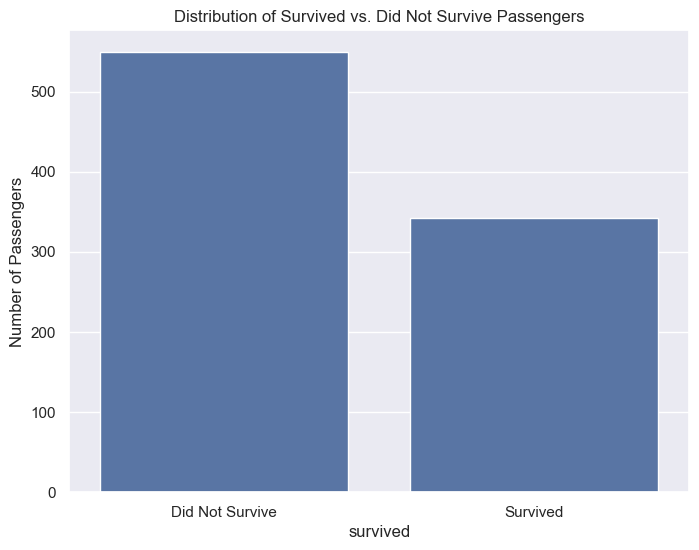

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived vs. Did Not Survive Passengers')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.show()

Insight: More passengers did not survive than survived.

2. Does ticket class (Pclass) affect safety ratings?

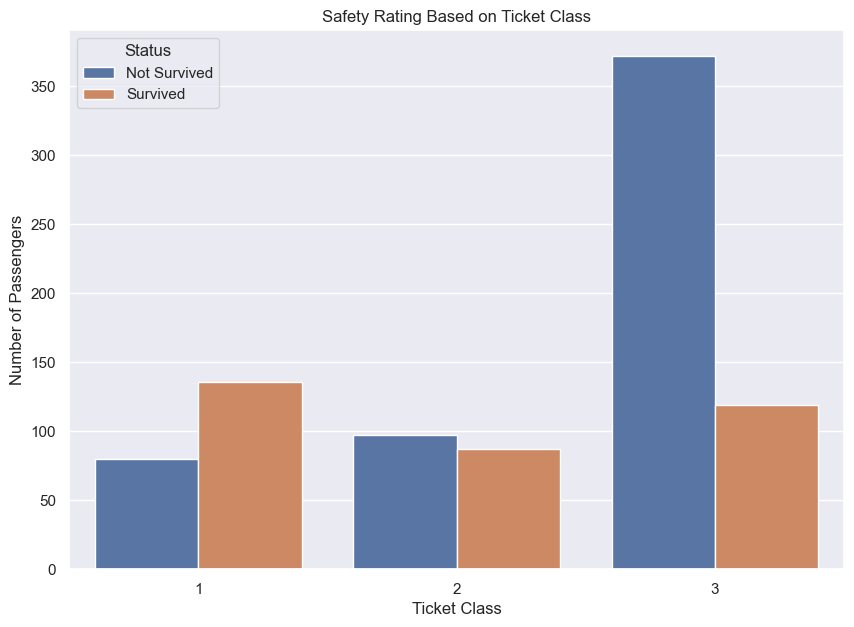

In [6]:
plt.figure(figsize=(10, 7))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Safety Rating Based on Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Status', labels=['Not Survived', 'Survived'])
plt.show()

Insight: Passengers in Class 1 have the highest chance of survival, while passengers in Class 3 have the lowest. This suggests a strong correlation between socioeconomic status and safety.

3. Does gender affect survival rates?

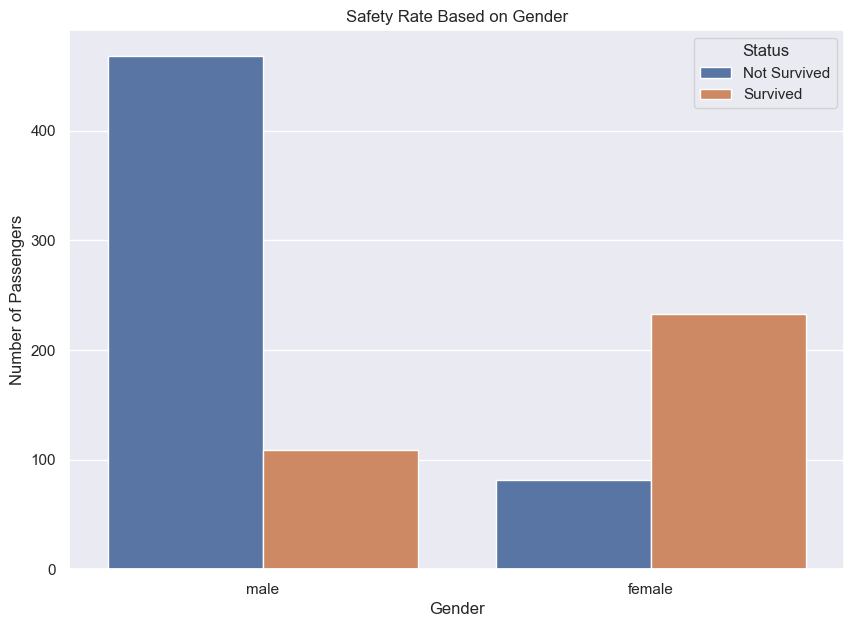

In [7]:
plt.figure(figsize=(10, 7))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Safety Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Status', labels=['Not Survived', 'Survived'])
plt.show()


Insight: Female passengers have a significantly higher safety rating than male passengers. This is in accordance with the "women and children first" protocol.

4. What is the age distribution of passengers?

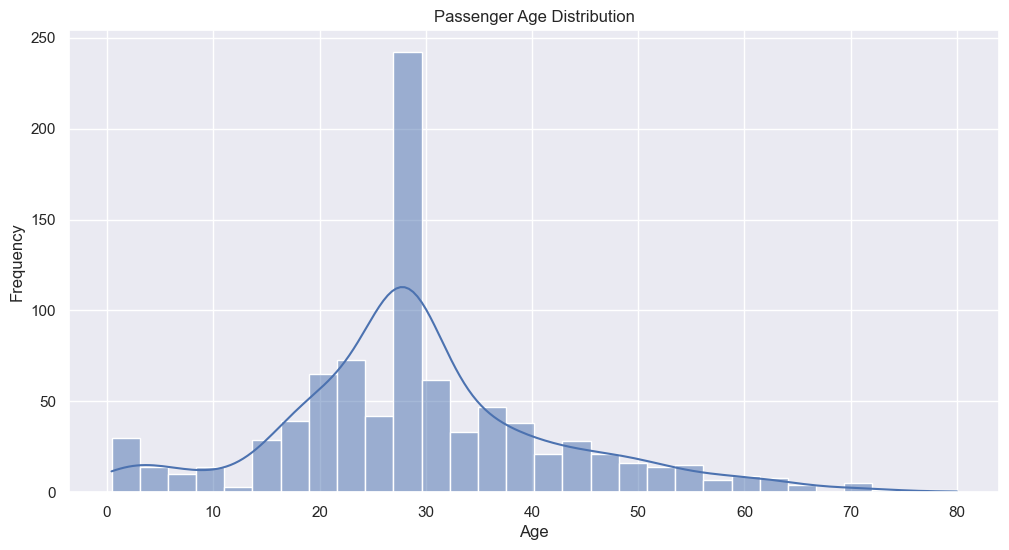

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight: The majority of passengers are in the 20-40 age range.